In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
data = pd.read_csv("boston.csv")

# Display basic information to understand structure
print("Dataset Info:\n", data.info())

# Drop unnecessary columns (like 'Unnamed: 0' which is an index column)
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Split data into features and target
X = data.drop(columns=['MEDV'])  # MEDV is the target variable (housing price)
y = data['MEDV']

# Normalize the features using StandardScaler (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
Dataset Info:
 None

Missing Values:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
d

# New Section

In [6]:
# Define a class to handle training and evaluation of MLP models
class MLPModelTrainer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.results = {}

    def build_model(self, input_shape, hidden_layers, units):
        model = tf.keras.Sequential()
        model.add(Dense(units, activation='relu', input_shape=(input_shape,)))

        for _ in range(hidden_layers - 1):
            model.add(Dense(units, activation='relu'))

        model.add(Dense(1))  # Output layer for regression
        model.compile(optimizer='adam', loss='mse')
        return model

    def train_and_evaluate(self, configs):
        for layers, units in configs:
            model = self.build_model(input_shape=self.X_train.shape[1],
                                     hidden_layers=layers,
                                     units=units)
            model.fit(self.X_train, self.y_train, epochs=100, batch_size=16, verbose=0)
            mse = model.evaluate(self.X_test, self.y_test, verbose=0)
            config_name = f"{layers} Layers, {units} Units"
            self.results[config_name] = mse
            print(f"{config_name} => MSE: {mse:.4f}")

    def plot_results(self):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.bar(self.results.keys(), self.results.values(), color='orange')
        plt.ylabel('Mean Squared Error')
        plt.xlabel('Architecture')
        plt.title('MLP Architecture Comparison')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [8]:
from tensorflow.keras import Input

def build_model(self, input_shape, hidden_layers, units):
    model = tf.keras.Sequential()

    # Add Input layer explicitly
    model.add(Input(shape=(input_shape,)))

    # First hidden layer
    model.add(Dense(units, activation='relu'))

    # Additional hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(units, activation='relu'))

    # Output layer
    model.add(Dense(1))  # Regression output
    model.compile(optimizer='adam', loss='mse')
    return model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1 Layers, 32 Units => MSE: 31.5235


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2 Layers, 64 Units => MSE: 23.2357


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3 Layers, 128 Units => MSE: 17.9586


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2 Layers, 128 Units => MSE: 21.6084


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3 Layers, 256 Units => MSE: 22.5286


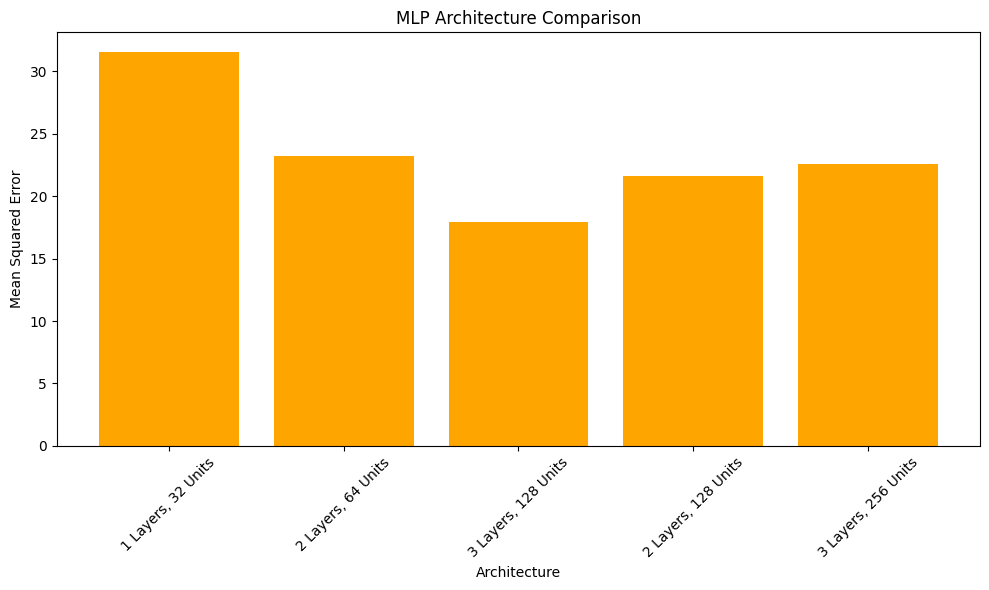

In [9]:
# Define the list of architectures
architectures_to_test = [
    (1, 32),
    (2, 64),
    (3, 128),
    (2, 128),
    (3, 256)
]

# Initialize and run training
trainer = MLPModelTrainer(X_train, X_test, y_train, y_test)
trainer.train_and_evaluate(architectures_to_test)
trainer.plot_results()
